# Access Control Effector - Response-Time Delta

Requires base line response times (without an effector) and response times with access control effector.

Directory structure
* probe-experiment-\$SETUP
  * exp-\$N
  * baseline


[1] "data/probe-experiment-node2/baseline/response-time/response-time.csv"
[1] "data/probe-experiment-node2/exp-1/10000/response-time/response-time.csv"
[1] "Processed data"


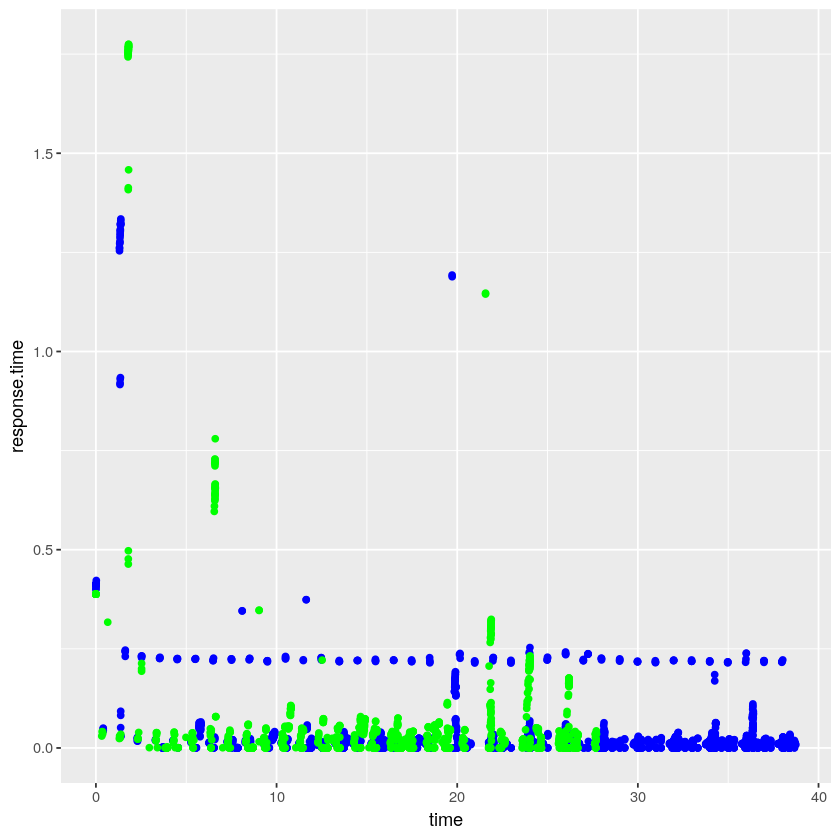

In [33]:
library(ggplot2)
library(magrittr)
library(ggpubr)
library(repr)
library(reshape2)
library(nlme)

data_path <- "data"
setup <- "node2"
experiment <- 1

baseline_path <- sprintf("%s/probe-experiment-%s/baseline", data_path, setup)
experiment_path <- sprintf("%s/probe-experiment-%s/exp-%d", data_path, setup, experiment)

model_sizes <- c(1,2,3,4,5,6,7,8,9,
                 10,11,12,13,14,15,16,17,18,19,
                 20,30,40,50,60,70,80,90,95,
                 100,110,120,130,140,150,
                 200,300,400,
                 500,550,560,570,580,590,
                 600,
                 700,710,720,730,740,750,
                 800,
                 900,950,960,970,980,990,
                 1000,1010,1020,1030,1040,1050,
                 2000,3000,4000,5000,6000,7000,8000,9000,
                 10000)

baseline_rspt_file <- sprintf("%s/response-time/response-time.csv", baseline_path)

if (file.exists(baseline_rspt_file)) {
    if (file.size(baseline_rspt_file) > 0) {
        print(baseline_rspt_file)
        baseline_data <- read.csv(baseline_rspt_file, header=TRUE)

        baseline_data <- baseline_data[ which(baseline_data$event.type == 'AfterOperationEvent' & 
                                              baseline_data$operation == 'public abstract interface void org.openqa.selenium.WebElement.click()'), ]

        base_time <- baseline_data[1,4]

        baseline_data[,4] <- (baseline_data[,4] - base_time)/1000/1000/1000
        baseline_data[,3] <- baseline_data[,3]/1000/1000/1000
    } else {
        print(sprintf("Baseline file %s is empty.", data_path))
    }
} else {
    print(sprintf("Baseline file %s is missing", data_path))
}

for (model_size in c(10000)) {
    exp_rspt_file <- sprintf("%s/%d/response-time/response-time.csv", experiment_path, model_size)
    
        if (file.exists(data_path)) {
        if (file.size(data_path) > 0) {
            print(exp_rspt_file)
            data <- read.csv(exp_rspt_file, header=TRUE)

            data <- data[ which(data$event.type == 'AfterOperationEvent' & 
                                data$operation == 'public abstract interface void org.openqa.selenium.WebElement.click()'), ]

            base_time <- data[1,4]

            data[,4] <- (data[,4] - base_time)/1000/1000/1000
            data[,3] <- data[,3]/1000/1000/1000
            
            print(sprintf("Processed %s", data_path))
        } else {
            print(sprintf("File %s is empty.", data_path))
        }
    } else {
        print(sprintf("File %s is missing", data_path))
    }  
}

            ggplot(data, aes(time, response.time)) + 
                geom_point(colour = "blue") +
                geom_point(data = baseline_data, colour="green")

In [34]:
print (sprintf("base %f %f exp %f %f\n",
    mean(baseline_data[,3]),
    median(baseline_data[,3]),
    mean(data[,3]),
    median(data[,3])))

[1] "base 0.100127 0.020613 exp 0.056108 0.014832\n"


In [35]:
max(baseline_data[,4])

[1] 27.71129

In [36]:
max(data[,4])

[1] 38.74622

In [38]:
data

,task,event.type,response.time,time,operation
1,org.iobserve.selenium.behavior.tasks.jpetstore.common.LoginJPetStoreTask,AfterOperationEvent,0.40092108,0.000000000,public abstract interface void org.openqa.selenium.WebElement.click()
2,org.iobserve.selenium.behavior.tasks.jpetstore.common.LoginJPetStoreTask,AfterOperationEvent,0.40102776,-0.000003584,public abstract interface void org.openqa.selenium.WebElement.click()
5,org.iobserve.selenium.behavior.tasks.jpetstore.common.LoginJPetStoreTask,AfterOperationEvent,0.40999804,0.008968448,public abstract interface void org.openqa.selenium.WebElement.click()
6,org.iobserve.selenium.behavior.tasks.jpetstore.common.LoginJPetStoreTask,AfterOperationEvent,0.40999203,0.008968704,public abstract interface void org.openqa.selenium.WebElement.click()
7,org.iobserve.selenium.behavior.tasks.jpetstore.common.LoginJPetStoreTask,AfterOperationEvent,0.41008835,0.009060864,public abstract interface void org.openqa.selenium.WebElement.click()
8,org.iobserve.selenium.behavior.tasks.jpetstore.common.LoginJPetStoreTask,AfterOperationEvent,0.40807385,0.007042304,public abstract interface void org.openqa.selenium.WebElement.click()
9,org.iobserve.selenium.behavior.tasks.jpetstore.common.LoginJPetStoreTask,AfterOperationEvent,0.41162856,0.010621184,public abstract interface void org.openqa.selenium.WebElement.click()
10,org.iobserve.selenium.behavior.tasks.jpetstore.common.LoginJPetStoreTask,AfterOperationEvent,0.41162887,0.010650368,public abstract interface void org.openqa.selenium.WebElement.click()
11,org.iobserve.selenium.behavior.tasks.jpetstore.common.LoginJPetStoreTask,AfterOperationEvent,0.41232046,0.011804928,public abstract interface void org.openqa.selenium.WebElement.click()
12,org.iobserve.selenium.behavior.tasks.jpetstore.common.LoginJPetStoreTask,AfterOperationEvent,0.41289156,0.011894528,public abstract interface void org.openqa.selenium.WebElement.click()
